In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from config import paths
from notebooks.eda.eda_visualization import quick_dist_box

# 00 Data Understanding

Objetivo: consolidar o contexto do projeto, a origem dos dados, o dicionário inicial de variáveis e os sanity checks que garantem que a base esta pronta para a exploração.

## Dicionário inicial de variáveis

Pretende-se mostrar um breve resumo do significado de cada coluna, tipo de dados, análise visuais para despistes iniciais. 

Se houver colunas redundantes (ex: `NumberOfWC` vs `NumberOfBathrooms`), marcar para decisão futura.

Sugestão de estrutura:
- Identificação: id, data de publicação.
- Localização: distrito, cidade, freguesia.
- Imóvel: tipologia, áreas, piso.
- Preço: valor, moeda, impostos incluídos.
- Atributos: elevador, estacionamento, garagem.

## Setup e leitura

Carregar o dataset bruto e inspecao inicial.


In [27]:
DATA_PATH = paths.RAW_LISTINGS_FILE
DATA_PATH

WindowsPath('C:/denv_testes/pt-real-estate-deal-engine/data/00_raw/portugal_listinigs.csv')

In [ ]:
df = pd.read_csv(DATA_PATH)
print(df.shape)
df.head()

(135536, 25)


C:\Users\lhenriques\AppData\Local\Temp\ipykernel_15308\148361422.py:1: DtypeWarning: Columns (9,10,12,13,14,15,16,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(DATA_PATH)


,Price,District,City,Town,Type,EnergyCertificate,GrossArea,TotalArea,Parking,HasParking,...,Elevator,ElectricCarsCharging,TotalRooms,NumberOfBedrooms,NumberOfWC,ConservationStatus,LivingArea,LotSize,BuiltArea,NumberOfBathrooms
0,780000.0,Vila Real,Valpaços,Carrazedo de Montenegro e Curros,Farm,NC,200.0,552450.0,0.0,False,...,False,NaN,NaN,NaN,NaN,NaN,120.0,NaN,NaN,0.0
1,223000.0,Faro,São Brás de Alportel,São Brás de Alportel,Apartment,A+,NaN,81.0,1.0,True,...,True,NaN,2.0,NaN,NaN,NaN,81.0,NaN,NaN,2.0
2,228000.0,Faro,São Brás de Alportel,São Brás de Alportel,Apartment,A+,NaN,108.0,1.0,True,...,True,NaN,2.0,NaN,NaN,NaN,108.0,NaN,NaN,2.0
3,250000.0,Faro,São Brás de Alportel,São Brás de Alportel,Apartment,A+,NaN,114.0,1.0,True,...,True,NaN,2.0,NaN,NaN,NaN,114.0,NaN,NaN,0.0
4,250000.0,Faro,São Brás de Alportel,São Brás de Alportel,Apartment,A+,NaN,114.0,1.0,True,...,True,NaN,2.0,NaN,NaN,NaN,114.0,NaN,NaN,2.0


## Sanity checks

Checks mínimos antes de seguir:
- Dimensões e colunas esperadas.
- Duplicados por chave logica (se existir).
- Valores negativos em preço e áreas.
- Datas no futuro.
- Colunas completamente vazias.

In [ ]:
# Colunas e tipos de dados
pd.DataFrame({
    "column": df.columns,
    "dtype": [str(t) for t in df.dtypes],
})

,column,dtype
0,Price,float64
1,District,object
2,City,object
3,Town,object
4,Type,object
5,EnergyCertificate,object
6,GrossArea,float64
7,TotalArea,float64
8,Parking,float64
9,HasParking,object


In [30]:
# verificações iniciais de dados
summary = {
    "n_rows": len(df),
    "n_cols": df.shape[1],
    "n_duplicates": df.duplicated().sum(),
}
summary

{'n_rows': 135536, 'n_cols': 25, 'n_duplicates': np.int64(8913)}

In [31]:
# remover duplicados 
df = df.drop_duplicates().reset_index(drop=True)

In [ ]:
# verificar se existem valores negativos nas variáveis numericas
negative_counts = {}

for col in df.select_dtypes(include="number").columns:
    negative_counts[col] = (df[col] < 0).sum()

negative_counts

{'Price': np.int64(0),
 'GrossArea': np.int64(2),
 'TotalArea': np.int64(7),
 'Parking': np.int64(0),
 'ConstructionYear': np.int64(0),
 'TotalRooms': np.int64(0),
 'NumberOfBedrooms': np.int64(0),
 'NumberOfWC': np.int64(1),
 'LivingArea': np.int64(0),
 'LotSize': np.int64(0),
 'BuiltArea': np.int64(1),
 'NumberOfBathrooms': np.int64(3)}

In [33]:
relatorio_nan = pd.DataFrame({
    "total_amostras" : len(df),
    "quantidade_nan": df.isna().sum(),
    "percentagem_nan": (df.isna().sum() / len(df) * 100).round(2)
}).sort_values("percentagem_nan", ascending=False)

relatorio_nan

,total_amostras,quantidade_nan,percentagem_nan
ConservationStatus,126623,108575,85.75
BuiltArea,126623,101785,80.38
GrossArea,126623,100609,79.46
Floor,126623,100524,79.39
PublishDate,126623,98708,77.95
LotSize,126623,89719,70.86
NumberOfBedrooms,126623,82800,65.39
NumberOfWC,126623,73347,57.93
Garage,126623,63912,50.47
EnergyEfficiencyLevel,126623,63912,50.47


## Análise de Valores em Falta (Dataset Global)

Antes de qualquer outra análise, foi analisada a quantidade e percentagem de valores em falta por variável.

Observa-se que várias colunas apresentam percentagens muito elevadas de valores em falta (superiores a 50%), nomeadamente:

- `ConservationStatus` (85.75%)
- `BuiltArea` (80.38%)
- `GrossArea` (79.46%)
- `Floor` (79.39%)
- `PublishDate` (77.95%)
- `LotSize` (70.86%)

Esta elevada percentagem de valores em falta não resulta de problemas de ingestão ou erros técnicos, mas sim da **heterogeneidade estrutural do mercado imobiliário** e da **natureza opcional de muitas características nos anúncios**.

### Principais razões identificadas:

1. **Variáveis dependentes do tipo de imóvel**  
   Algumas colunas apenas fazem sentido para certos tipos de imóveis:
   - `LotSize` é relevante para moradias e terrenos, mas não para apartamentos.
   - `Floor` e `Elevator` aplicam-se quase exclusivamente a apartamentos.
   - `BuiltArea` e `GrossArea` são inconsistentes entre anúncios e frequentemente omitidas.

2. **Campos opcionais nos anúncios**  
   Informações como `ConservationStatus`, `EnergyEfficiencyLevel` ou `ElectricCarsCharging` não são obrigatórias nos portais imobiliários, sendo frequentemente deixadas em branco pelos anunciantes.

3. **Ausência de histórico consistente**  
   A variável `PublishDate` apresenta elevada percentagem de valores em falta, indicando que o dataset não representa um histórico completo de publicações, mas sim um conjunto agregado de anúncios.

4. **Normalização incompleta das fontes**  
   O dataset agrega anúncios de múltiplas origens, com diferentes padrões de preenchimento, o que resulta em assimetria na disponibilidade de dados.

### Implicações para futura modelação

Devido a estas ruturas estruturais:
- Não é adequado utilizar todas as variáveis num único modelo global.
- A análise e modelação devem ser feitas **por tipo de imóvel** (`Type`), garantindo coerência semântica e melhor qualidade dos dados.

Esta abordagem reduz ruído, evita imputações artificiais e conduz a modelos mais interpretáveis e robustos.


## EDA global (opcional)

Visualização rápida de distribuições e categorias para detetar outliers e valores improváveis.


Price | dtype=float64 | missing=0.22% | unique=4754


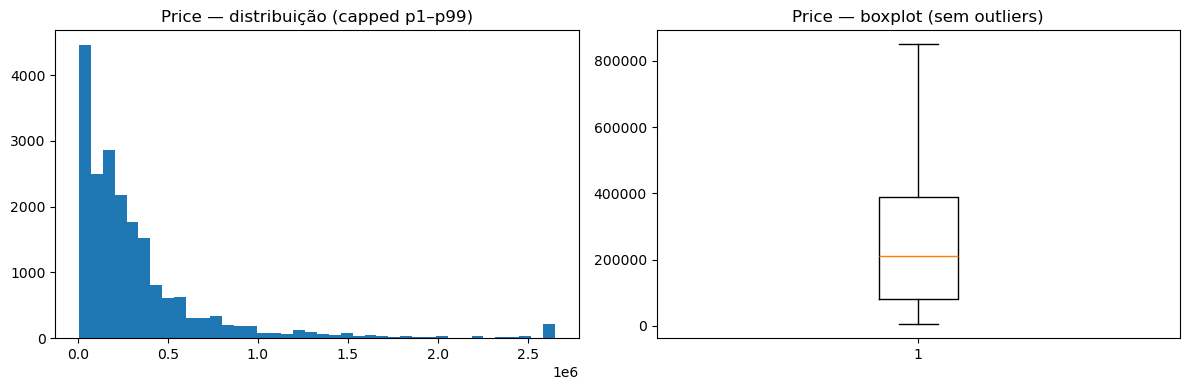

District | dtype=object | missing=0.00% | unique=27


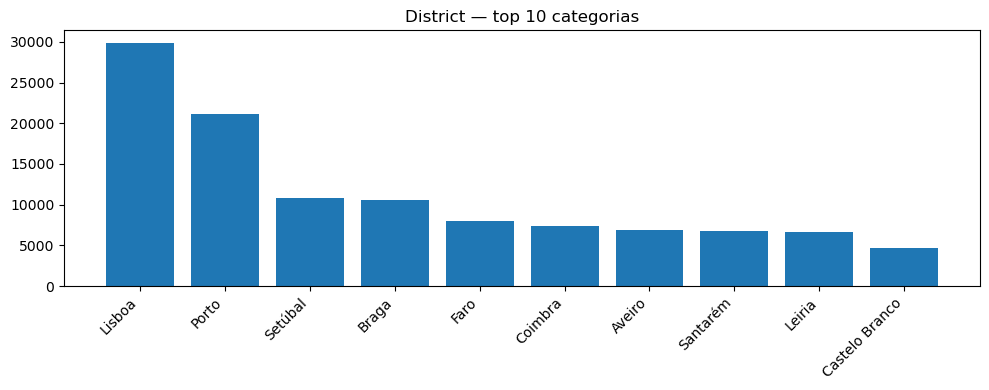

City | dtype=object | missing=0.00% | unique=275


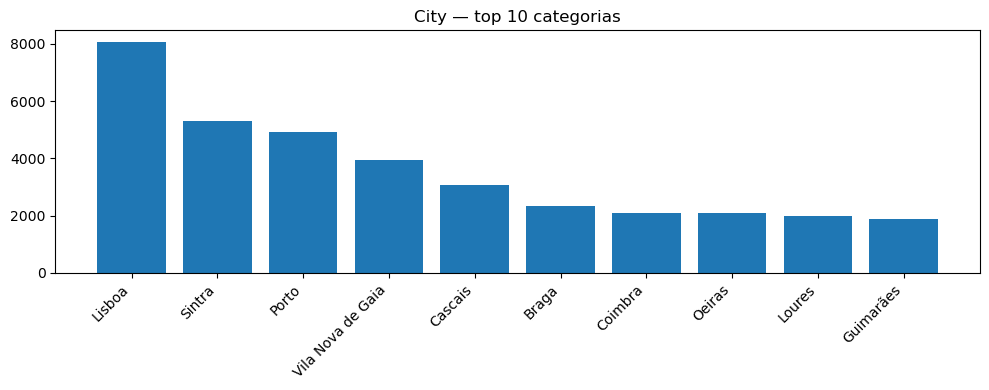

Town | dtype=object | missing=0.00% | unique=2263


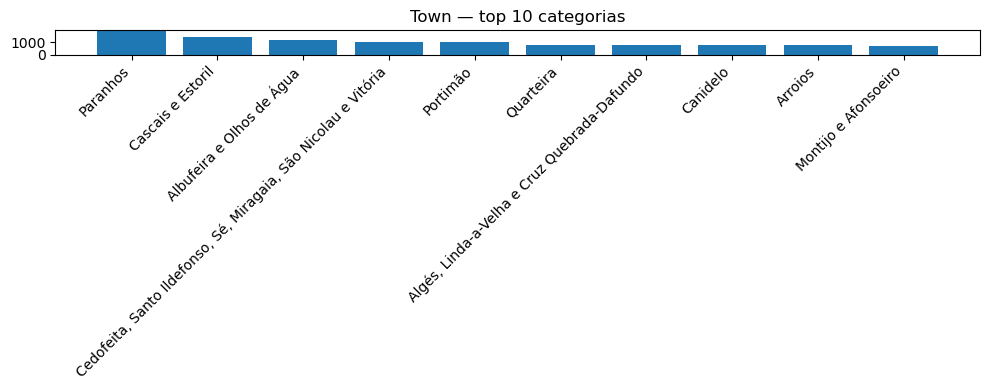

Type | dtype=object | missing=0.01% | unique=21


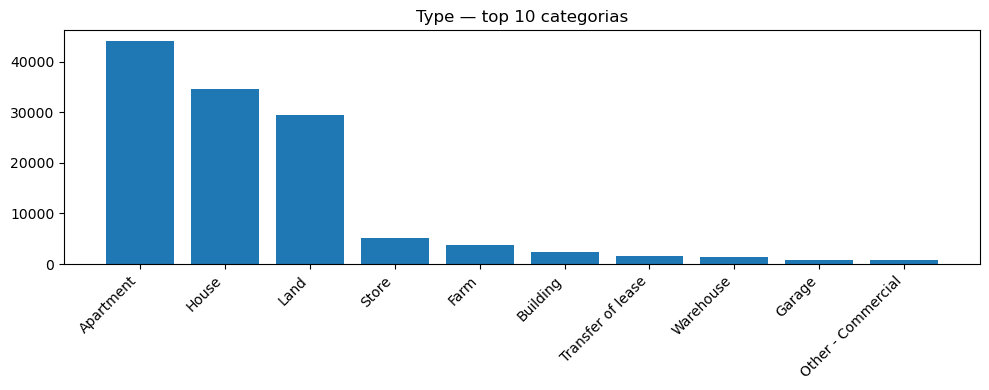

EnergyCertificate | dtype=object | missing=0.01% | unique=12


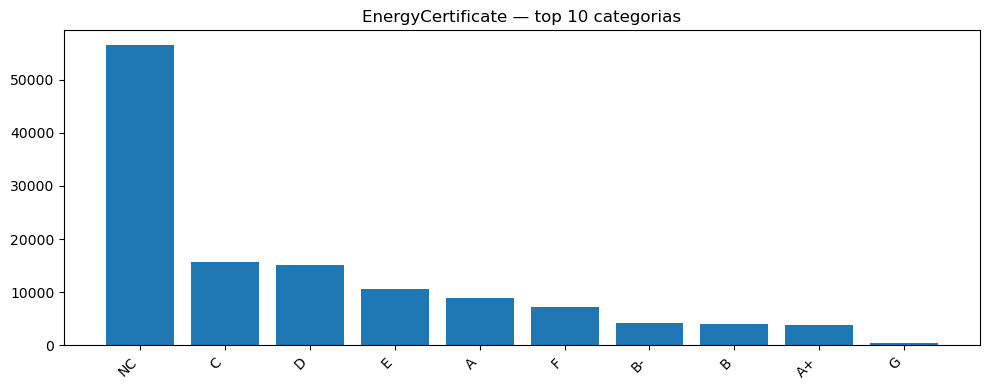

GrossArea | dtype=float64 | missing=79.46% | unique=2267


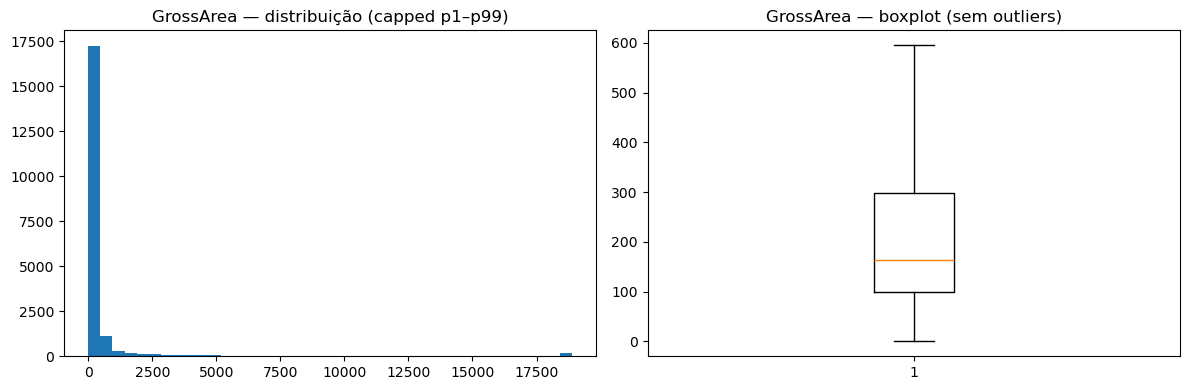

TotalArea | dtype=float64 | missing=6.17% | unique=7305


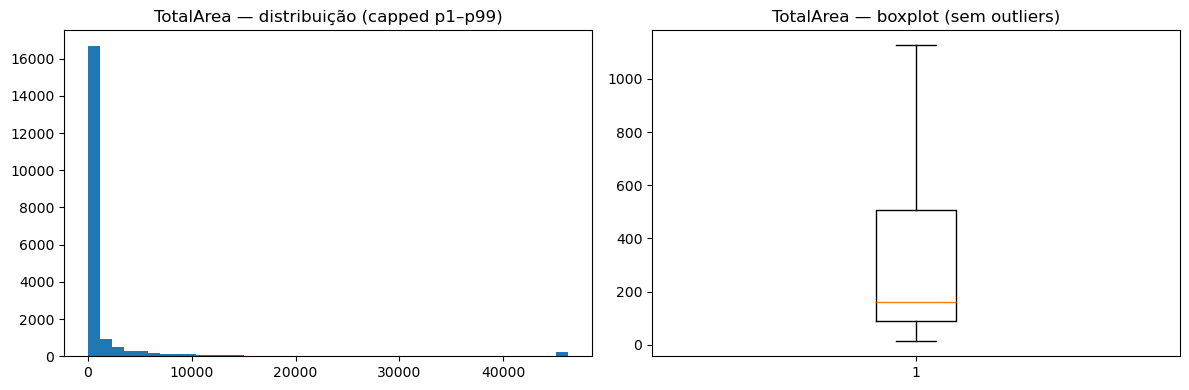

Parking | dtype=float64 | missing=0.12% | unique=4


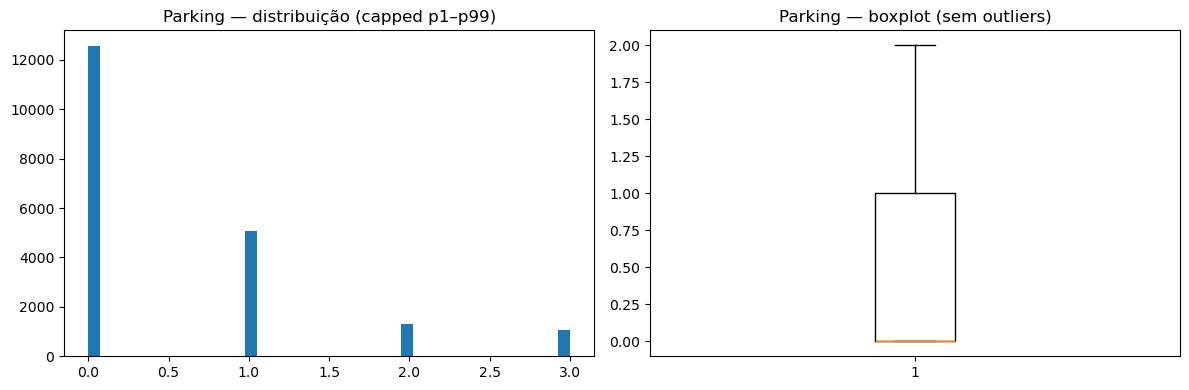

HasParking | dtype=object | missing=49.55% | unique=2


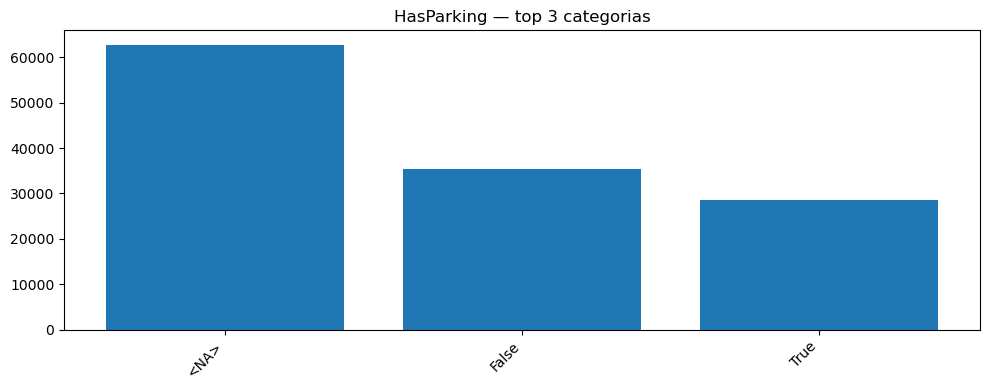

Floor | dtype=object | missing=79.39% | unique=19


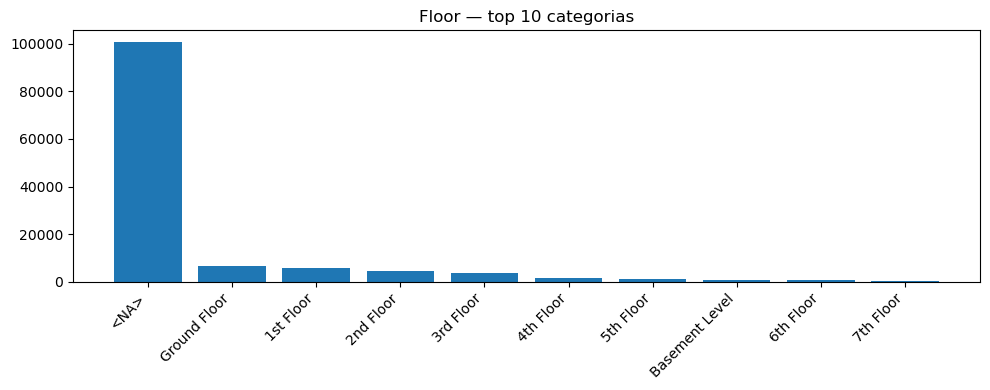

ConstructionYear | dtype=float64 | missing=34.21% | unique=125


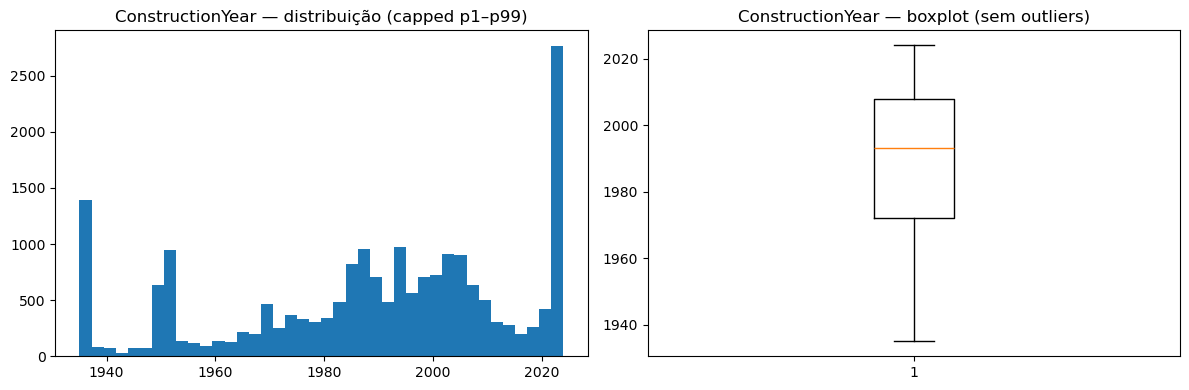

EnergyEfficiencyLevel | dtype=object | missing=50.47% | unique=11


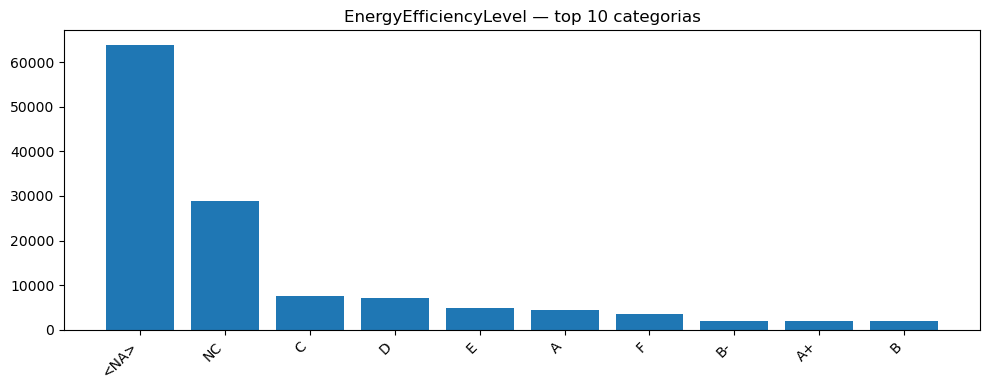

PublishDate | dtype=object | missing=77.95% | unique=27832


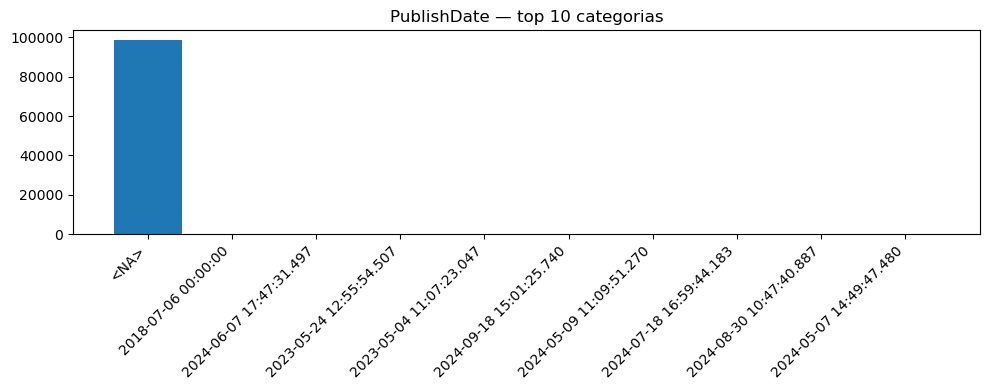

Garage | dtype=object | missing=50.47% | unique=2


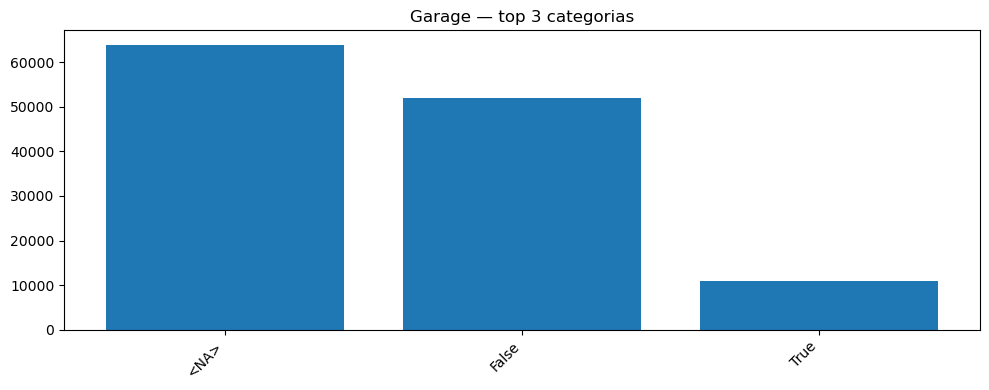

Elevator | dtype=object | missing=0.02% | unique=2


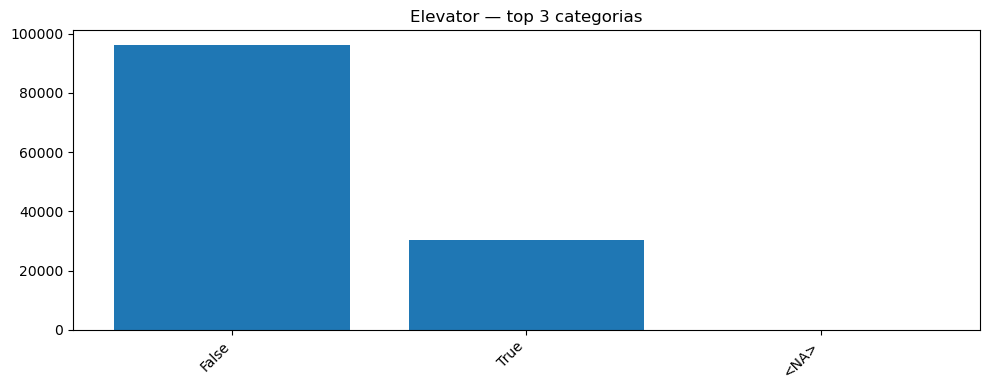

ElectricCarsCharging | dtype=object | missing=50.47% | unique=2


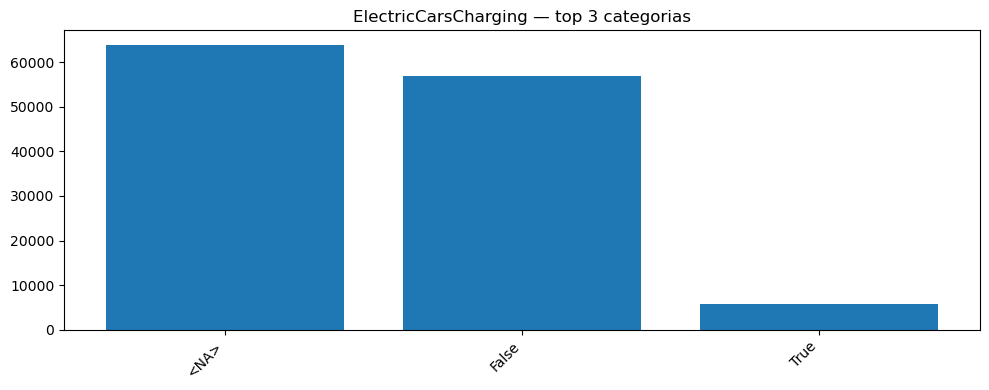

TotalRooms | dtype=float64 | missing=45.66% | unique=58


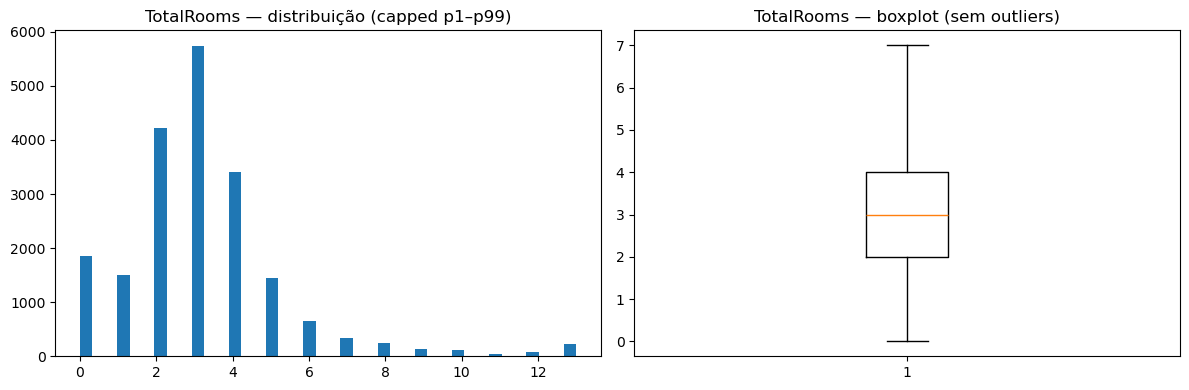

NumberOfBedrooms | dtype=float64 | missing=65.39% | unique=22


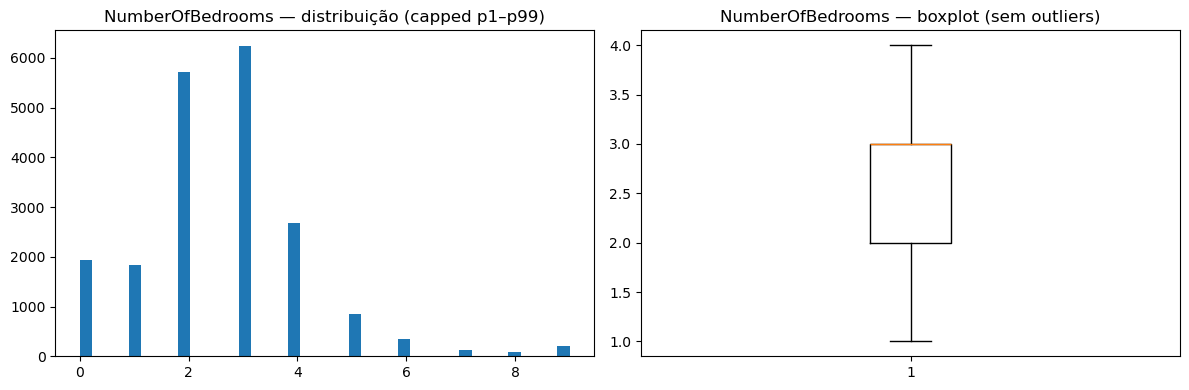

NumberOfWC | dtype=float64 | missing=57.93% | unique=27


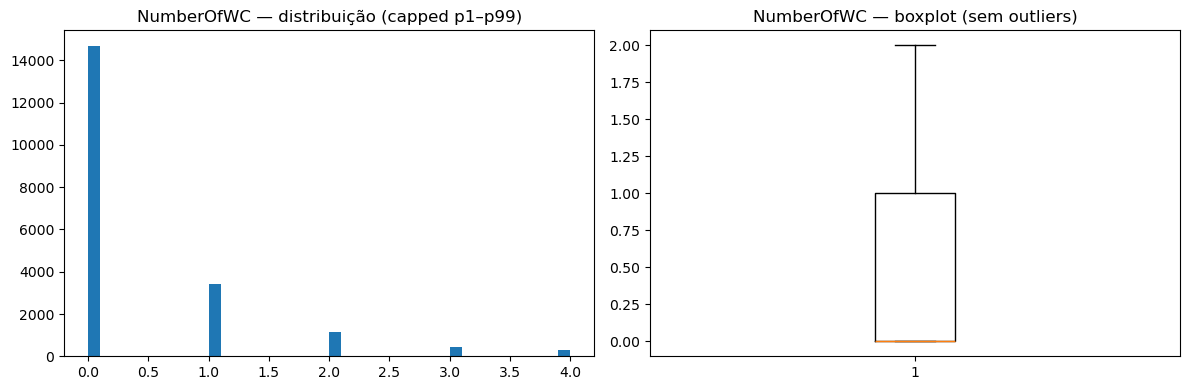

ConservationStatus | dtype=object | missing=85.75% | unique=6


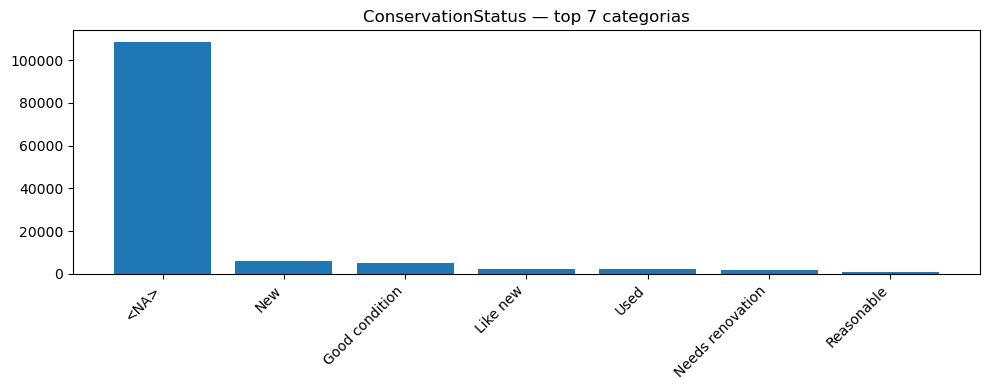

LivingArea | dtype=float64 | missing=22.51% | unique=3030


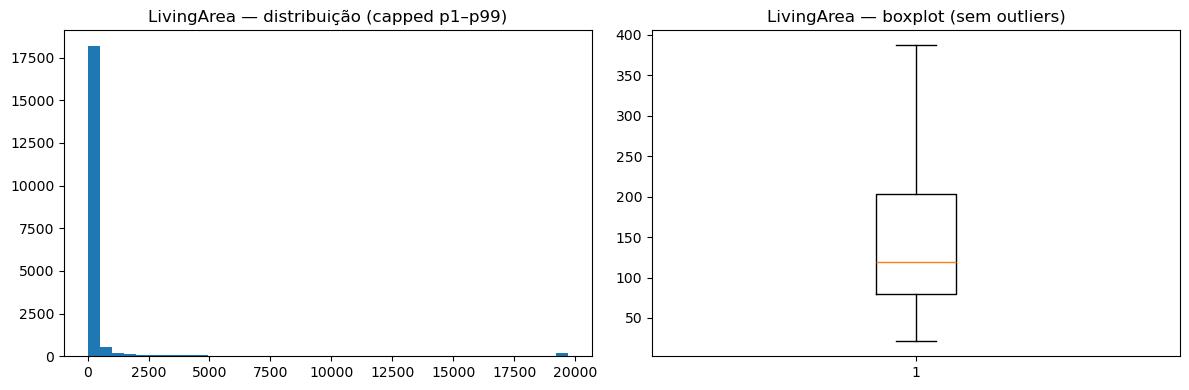

LotSize | dtype=float64 | missing=70.86% | unique=6778


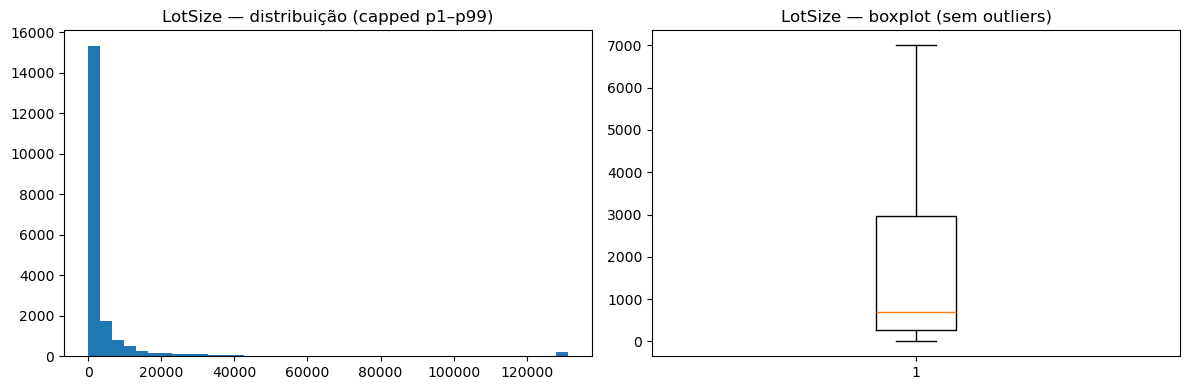

BuiltArea | dtype=float64 | missing=80.38% | unique=7296


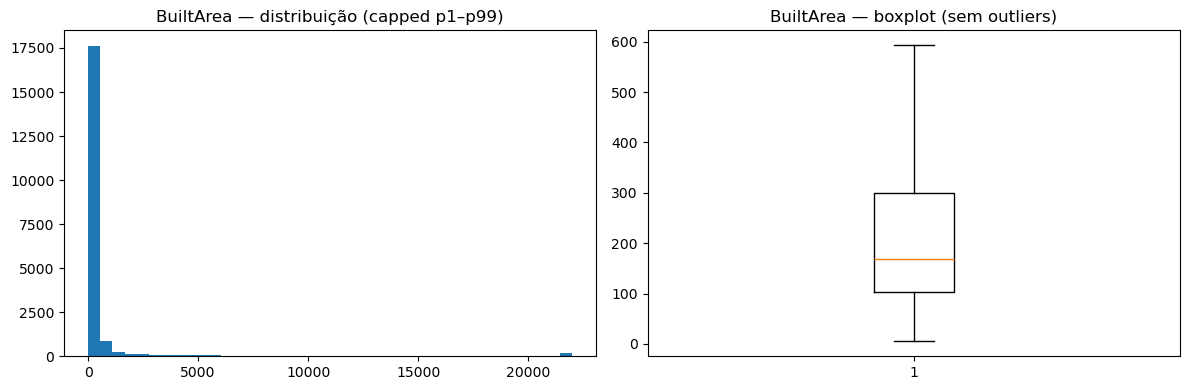

NumberOfBathrooms | dtype=float64 | missing=5.13% | unique=46


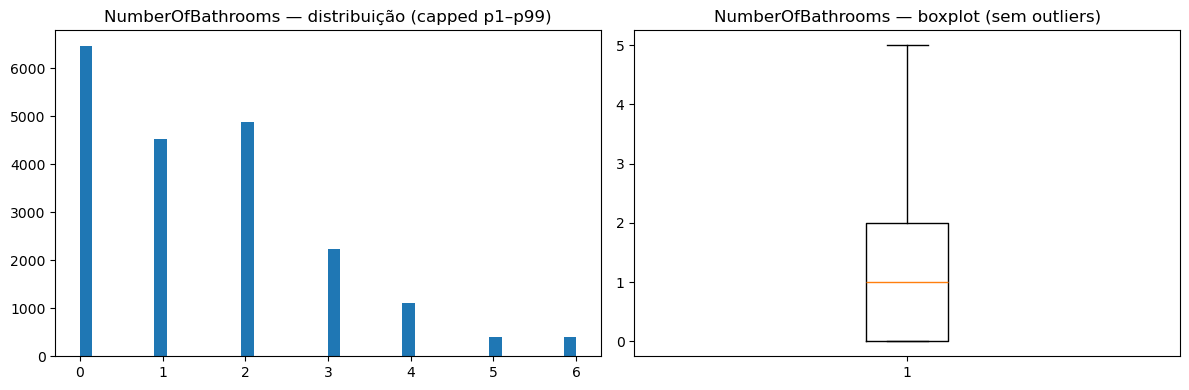

In [ ]:
# EDA rapido
quick_dist_box(df, features=df.columns)

## Distribuição por tipologia


In [35]:
df["Type"].unique()

array(['Farm', 'Apartment', 'Building', 'Land', 'House', 'Store',
       'Other - Residential', 'Garage', 'Transfer of lease',
       'Other - Commercial', 'Warehouse', 'Duplex', 'Investment', 'Hotel',
       'Office', 'Storage', 'Industrial', 'Estate', 'Mansion', nan,
       'Studio', 'Manor'], dtype=object)

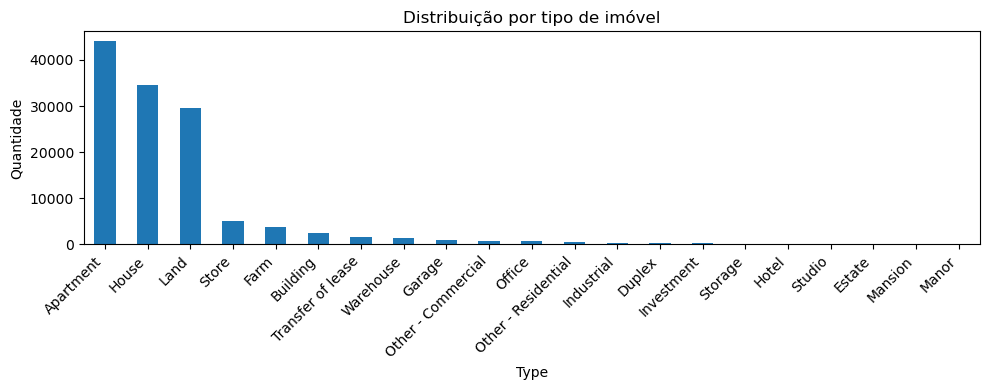

In [36]:
df["Type"].value_counts().plot(kind="bar", figsize=(10,4))
plt.title("Distribuição por tipo de imóvel")
plt.ylabel("Quantidade")
plt.xlabel("Type")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


## Separação por Tipologias

In [ ]:
df_apartment = df[df["Type"] == "Apartment"]
df_house = df[df["Type"] == "House"]
df_land = df[df["Type"] == "Land"]


# separar o conjunto de dados por tipologias principais 
df_apartment.to_parquet(paths.RAW_LISTINGS_FILE_APARTMENT)
df_house.to_parquet(paths.RAW_LISTINGS_FILE_HOUSE)
df_land.to_parquet(paths.RAW_LISTINGS_FILE_LAND)


print(len(df_apartment))
print(len(df_house))
print(len(df_land))

43999
34542
29535
